In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pisa-test-scores/pisa2009test.csv
/kaggle/input/pisa-test-scores/pisa2009train.csv


1. Load the dataset

In [2]:
pisa_df = pd.read_csv("/kaggle/input/pisa-test-scores/pisa2009train.csv")

In [3]:
pisa_df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


Unique Grades: [11  9 10 12  8]


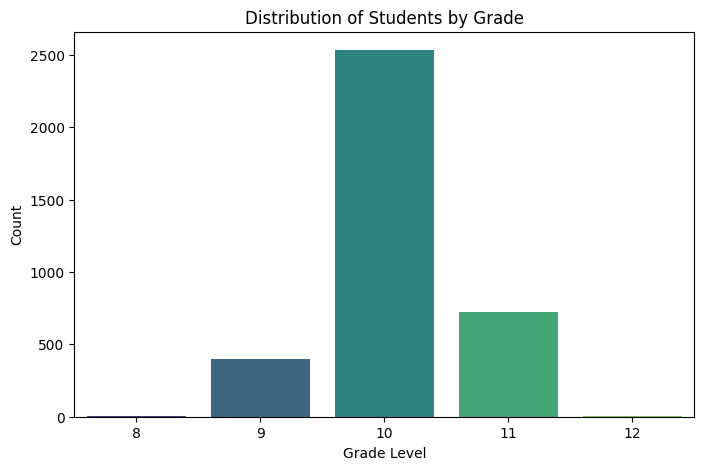

In [4]:
print("Unique Grades:", pisa_df["grade"].unique())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="grade", data=pisa_df, palette="viridis")
plt.title("Distribution of Students by Grade")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.show()

In [5]:
# Calculate the grade wise percentage of the data distribution
grade_counts = pisa_df["grade"].value_counts(normalize=True) * 100
print(grade_counts)

grade
10    69.123669
11    19.819820
9     10.838111
12     0.109200
8      0.109200
Name: proportion, dtype: float64


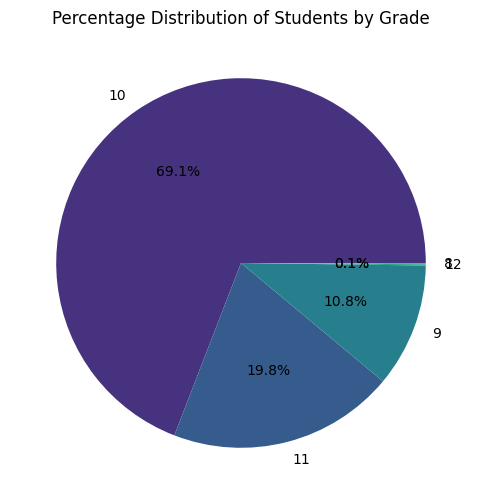

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis"))
plt.title("Percentage Distribution of Students by Grade")
plt.show()

The Second Column in the dataset 'male' is an indicator of whether the student is male (1 for male, 0 for female). Lets change the column name to more appropriate name 'Gender'.

In [7]:
pisa_df.rename(columns={"male": "gender"}, inplace=True)

In [8]:
gender_counts = pisa_df["gender"].value_counts()
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 gender
1    1872
0    1791
Name: count, dtype: int64


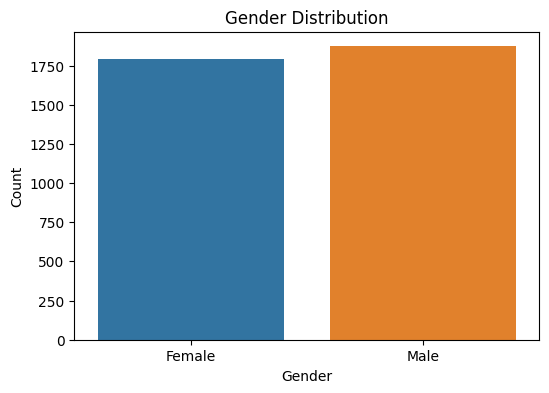

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["#1f77b4", "#ff7f0e"])
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Lets find out the grade wise distribution of male and female students. 

In [10]:
gender_grade_counts = pisa_df.groupby(["grade", "gender"]).size().unstack()
print("Grade wise distribution of Gender:\n", gender_grade_counts)

Grade wise distribution of Gender:
 gender     0     1
grade             
8          2     2
9        146   251
10      1235  1297
11       406   320
12         2     2


In [11]:
gender_grade_percent = gender_grade_counts.div(gender_grade_counts.sum(axis=1), axis=0) * 100
# Percentage breakdown
print("Grade-wise Percentage Distribution of Gender:\n", gender_grade_percent)

Grade-wise Percentage Distribution of Gender:
 gender          0          1
grade                       
8       50.000000  50.000000
9       36.775819  63.224181
10      48.775671  51.224329
11      55.922865  44.077135
12      50.000000  50.000000


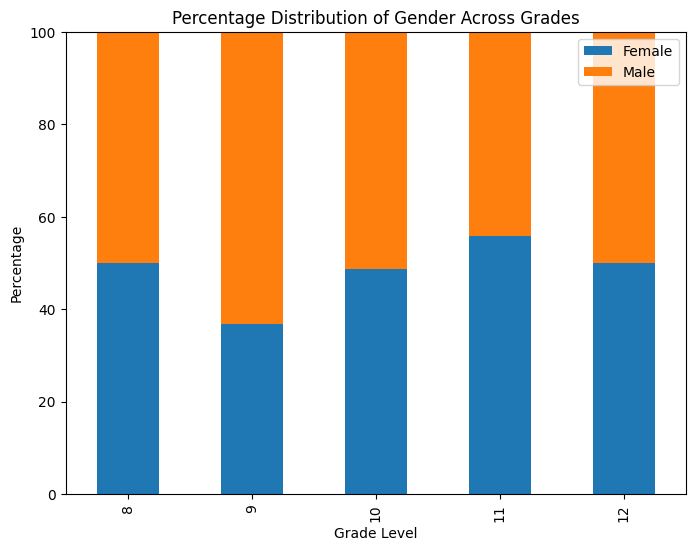

In [12]:
gender_grade_percent.plot(kind="bar", stacked=True, figsize=(8,6), color=["#1f77b4", "#ff7f0e"])
plt.title("Percentage Distribution of Gender Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Percentage")
plt.legend(["Female", "Male"])
plt.ylim(0, 100)  # Ensure y-axis is in percentage scale
plt.show()

Since 8th and 12th grades have extremely low representation, they might introduce noise rather than meaningful insights.

In [13]:
#Removing 8th and 12th grade from the dataset, since they only make 0.1% of the dataset. 
pisa_df = pisa_df[~pisa_df["grade"].isin([8, 12])]

In [14]:
pisa_df.shape

(3655, 24)

The 3rd Column Race/Ethinicity

In [15]:
print("Unique categories in raceeth:", pisa_df["raceeth"].unique())

Unique categories in raceeth: [nan 'White' 'Black' 'Hispanic' 'Asian' 'More than one race'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']


In [16]:
print(" 'raceeth' column NaN value count:", pisa_df["raceeth"].isnull().sum())

 'raceeth' column NaN value count: 35


In [17]:
# Count of each race/ethnicity group
raceeth_counts = pisa_df["raceeth"].value_counts()
print("Race/Ethnicity Distribution:\n", raceeth_counts)

Race/Ethnicity Distribution:
 raceeth
White                                     2011
Hispanic                                   833
Black                                      442
Asian                                      142
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: count, dtype: int64


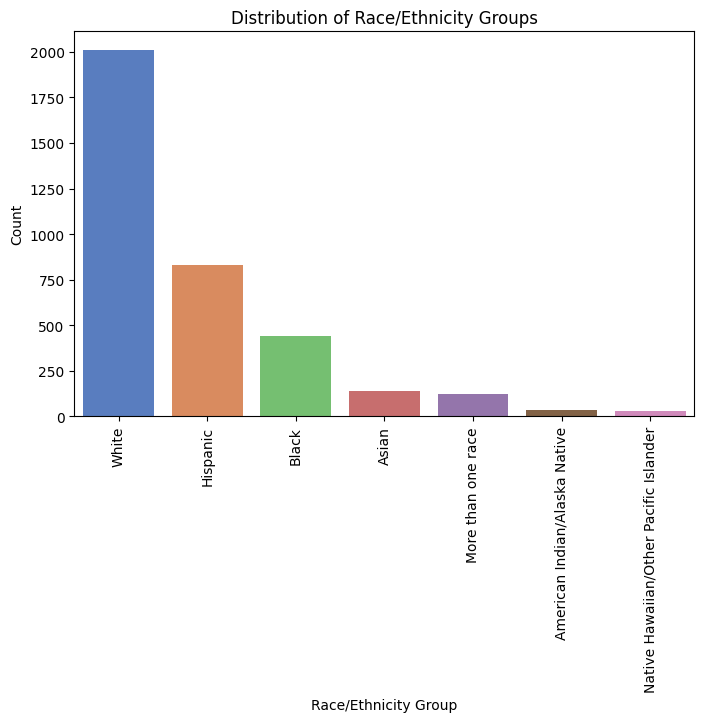

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=raceeth_counts.index, y=raceeth_counts.values, palette="muted")
plt.title("Distribution of Race/Ethnicity Groups")
plt.xlabel("Race/Ethnicity Group")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [19]:
raceeth_grade_counts = pisa_df.groupby("grade")["raceeth"].value_counts().unstack()

# grade - Race/Ethinicity distibution counts
print("Race/Ethnicity Distribution by Grade:\n")
raceeth_grade_counts

Race/Ethnicity Distribution by Grade:



raceeth,American Indian/Alaska Native,Asian,Black,Hispanic,More than one race,Native Hawaiian/Other Pacific Islander,White
grade,,,,,,,
9,2,6,70,124,14,2,171
10,33,84,292,514,86,18,1485
11,2,52,80,195,24,11,355


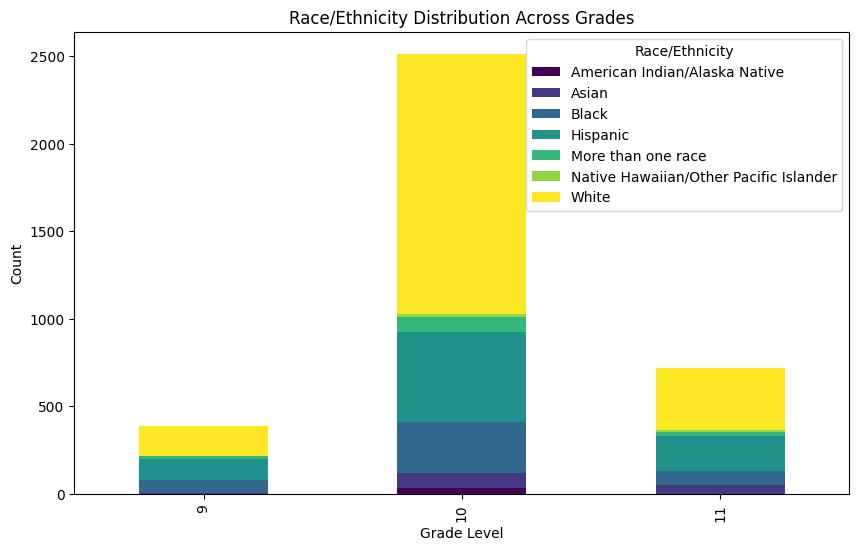

In [20]:
raceeth_grade_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Race/Ethnicity Distribution Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.legend(title="Race/Ethnicity")
plt.show()

<Figure size 1000x600 with 0 Axes>

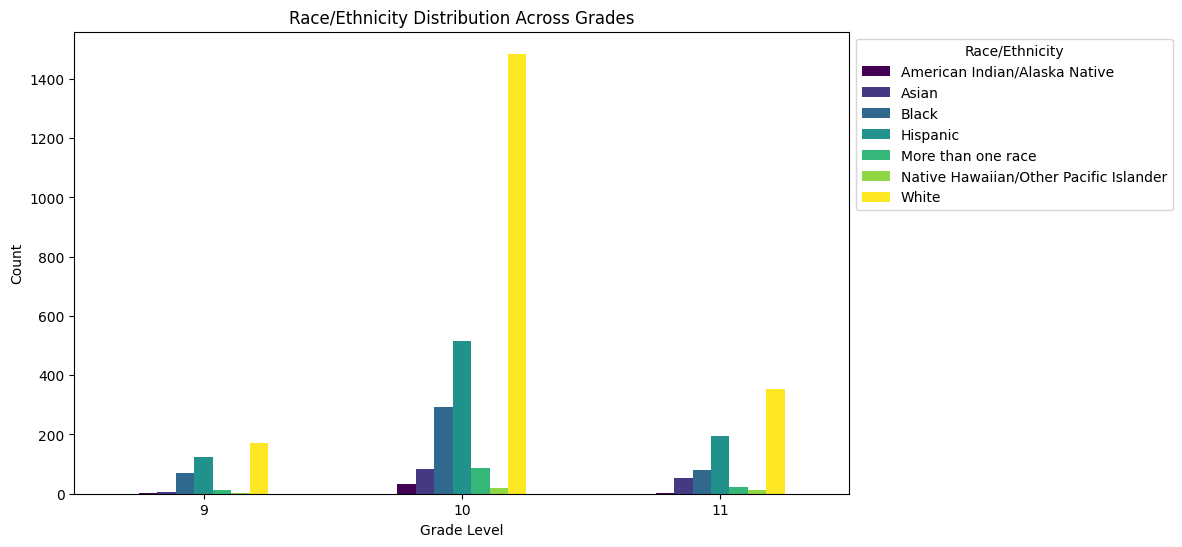

In [21]:
plt.figure(figsize=(10,6))
raceeth_grade_counts.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Race/Ethnicity Distribution Across Grades")
plt.xlabel("Grade Level")
plt.ylabel("Count")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()

In [22]:
print(pisa_df.isnull().sum())

grade                      0
gender                     0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          568
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        247
schoolHasLibrary         142
publicSchool               0
urban                      0
schoolSize               161
readingScore               0
dtype: int64
